In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind
import seaborn as sns
import matplotlib.pyplot as plt

In [31]:
plt.rcParams["figure.dpi"] = 120

In [32]:
data_dir = "../data"

In [75]:
df = pd.read_pickle(f"{data_dir}/full/bert_results_719241_cf-constant.pkl")

In [76]:
df

,text,label,uncertainty_before,uncertainty_after,uncertainty_difference,label_name
0,Fears for T N pension after talks Unions repre...,2,256.631348,111.865181,-144.766167,Business
1,The Race is On: Second Private Team Sets Launc...,3,172.708847,95.610954,-77.097893,Sci/Tech
2,Ky. Company Wins Grant to Study Peptides (AP) ...,3,173.916977,92.912521,-81.004456,Sci/Tech
3,Prediction Unit Helps Forecast Wildfires (AP) ...,3,199.056458,88.979057,-110.077400,Sci/Tech
4,Calif. Aims to Limit Farm-Related Smog (AP) AP...,3,205.149063,94.412033,-110.737030,Sci/Tech
...,...,...,...,...,...,...
7595,Around the world Ukrainian presidential candid...,0,195.340668,101.444817,-93.895851,World
7596,Void is filled with Clement With the supply of...,1,171.816879,86.971680,-84.845200,Sports
7597,Martinez leaves bitter Like Roger Clemens did ...,1,236.314026,101.437119,-134.876907,Sports
7598,5 of arthritis patients in Singapore take Bext...,2,226.700531,93.805870,-132.894661,Business


In [77]:
df_melted = df[["label_name", "uncertainty_before", "uncertainty_after"]].melt(
    id_vars=["label_name"],
    value_vars=["uncertainty_before", "uncertainty_after"],
    var_name="type",
    value_name="uncertainty",
)
df_melted["type"] = df_melted["type"].map(
    {
        "uncertainty_before": "Before",
        "uncertainty_after": "After",
    }
)

df_melted

,label_name,type,uncertainty
0,Business,Before,256.631348
1,Sci/Tech,Before,172.708847
2,Sci/Tech,Before,173.916977
3,Sci/Tech,Before,199.056458
4,Sci/Tech,Before,205.149063
...,...,...,...
15195,World,After,101.444817
15196,Sports,After,86.971680
15197,Sports,After,101.437119
15198,Business,After,93.805870


<Axes: xlabel='label_name', ylabel='uncertainty'>

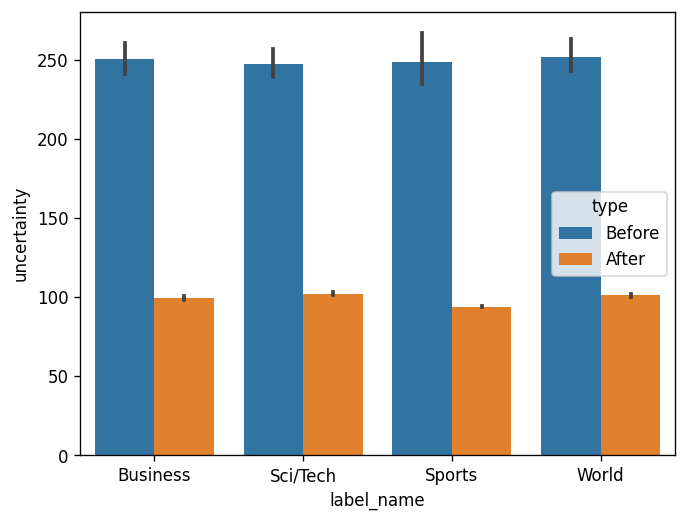

In [78]:
sns.barplot(data=df_melted, x="label_name", y="uncertainty", hue="type")

<Axes: xlabel='label_name', ylabel='uncertainty_difference'>

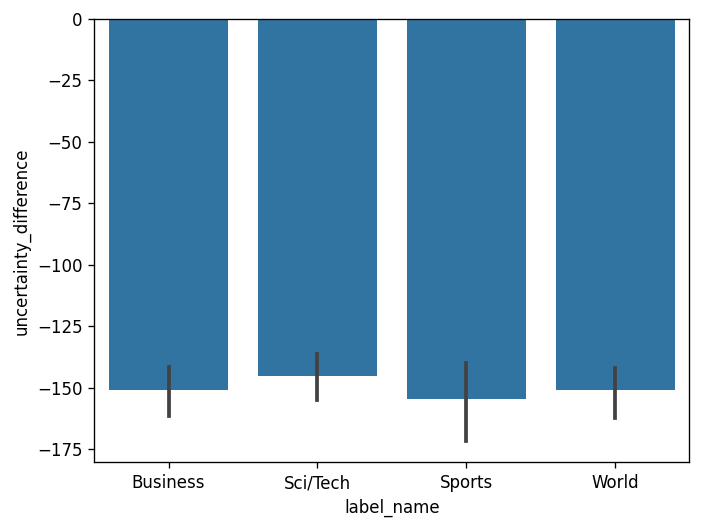

In [79]:
sns.barplot(data=df, x="label_name", y="uncertainty_difference")

In [80]:
sports_group = df[df["label_name"] == "Sports"]["uncertainty_difference"]
other_groups = df[df["label_name"] != "Sports"]["uncertainty_difference"]

t_stat, p_value = ttest_ind(sports_group, other_groups, equal_var=False)

print(f"Sports vs Others T-statistic: {t_stat:.4f}, P-value: {p_value:.4f}")

Sports vs Others T-statistic: -0.6036, P-value: 0.5462


In [81]:
for label in labels:
    if label != "Sports":
        other_group = df[df["label_name"] == label]["uncertainty_difference"]
        t_stat, p_value = ttest_ind(sports_group, other_group, equal_var=False)
        print(f"Sports vs {label:<10} T-statistic: {t_stat:>12.4f}, P-value: {p_value:.4f}")

Sports vs Business   T-statistic:      -0.3438, P-value: 0.7310
Sports vs Sci/Tech   T-statistic:      -0.9589, P-value: 0.3377
Sports vs World      T-statistic:      -0.3585, P-value: 0.7200
